In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense ,Conv2D , MaxPooling2D , Flatten, BatchNormalization,Dropout

In [3]:
train_ds =tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/DataSet/Penguin VS Turtule M/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


validation_ds = keras.utils.image_dataset_from_directory(
     directory = '/content/drive/MyDrive/DataSet/Penguin VS Turtule M/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

Found 202 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [4]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [5]:
## Create CNN Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [8]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 159s 21s/step - accuracy: 0.6229 - loss: 3.3841 - val_accuracy: 0.5050 - val_loss: 1.9380
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 111s 10s/step - accuracy: 0.8164 - loss: 1.8785 - val_accuracy: 0.4950 - val_loss: 1.3225
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 66s 10s/step - accuracy: 0.7715 - loss: 3.3635 - val_accuracy: 0.5800 - val_loss: 0.9979
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 67s 8s/step - accuracy: 0.8670 - loss: 2.8902 - val_accuracy: 0.5750 - val_loss: 2.1202
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 96s 10s/step - accuracy: 0.8750 - loss: 2.6352 - val_accuracy: 0.4950 - val_loss: 6.3397
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 64s 10s/step - accuracy: 0.9247 - loss: 1.4948 - val_accuracy: 0.5850 - val_loss: 2.2925
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 52s 8s/step - accuracy: 0.9457 - loss: 0.4263 - val_accuracy: 0.5000 - val_loss: 6.1547
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 8s/step - accuracy: 0.9698 - loss: 0.4184 - val_accuracy: 0.6200 - val_loss: 3.5468
E

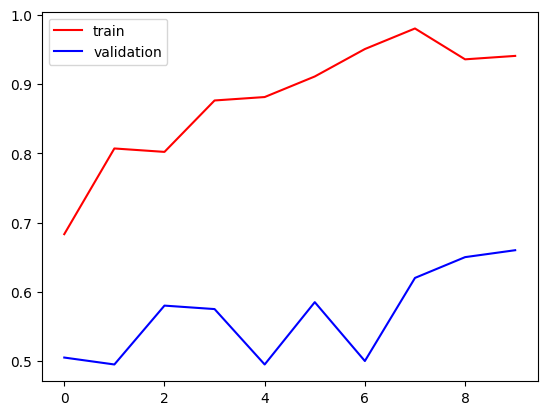

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

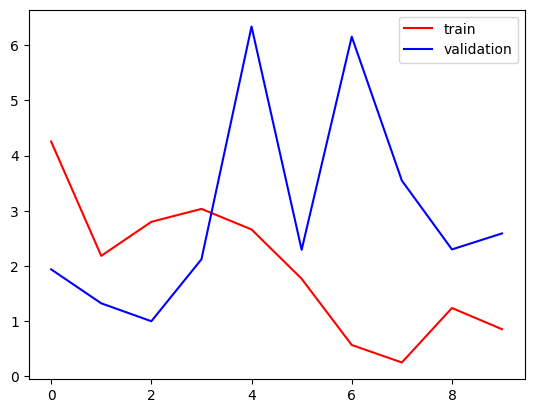

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
import cv2

In [12]:
test_img = cv2.imread('/content/drive/MyDrive/DataSet/26_penguin.png')

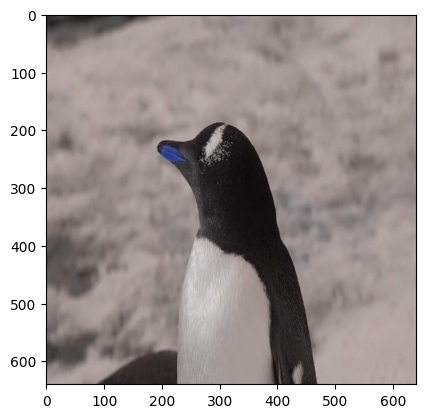

In [13]:
plt.imshow(test_img)

In [14]:
test_img.shape

(640, 640, 3)

In [15]:
test_img = cv2.resize(test_img,(256,256))

In [16]:
test_input = test_img.reshape((1,256,256,3))

In [17]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.]], dtype=float32)